<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da17_apt201910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   [apt_201910.csv](https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv) 파일을 읽어서 데이터 프레임 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv'

In [10]:
apt = pd.read_csv(file_path, encoding='cp949', thousands=',')
#> encoding: 파일의 인코딩 타입(utf-8, cp949: 한글 Windows, cp1252: 영문 Windows, ...)
#> thousands: 숫자의 천자리 구분자로 사용되는 문자

In [11]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [12]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [13]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [14]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


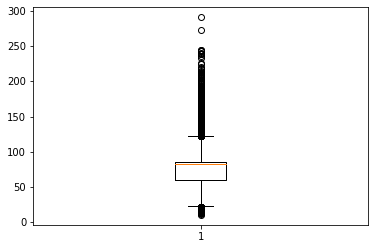

In [16]:
plt.boxplot(x=apt['면적'])
plt.show()

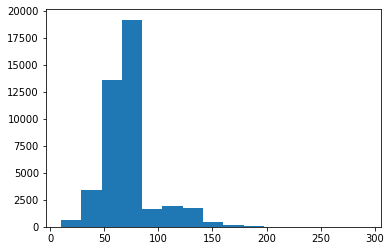

In [20]:
plt.hist(x=apt['면적'], bins=15)
plt.show()